<a href="https://colab.research.google.com/github/Eran707/MSc-Computational-Neuroscience-Repo/blob/master/Multicompartment_Sim_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Neural Multicompartment Simulator**

**Eran Frank Shorer**

**MSc Computational Neuroscience**

**"Investigating the effects of impermeant anions on the electrical and computational properties of neurons"**




## Instructions:

This jupyter notebook consists of cells. Some cells are plain text, while others are code. 

Press Shift-Enter simultaneously, or click the cell and press the play button in the main toolbar above to run the cell. 

The output of the cell should be displayed below the cell. 



## **Import classes and modules** 


In [10]:
import pandas as pd
try:
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import common
    import constants
    import compartment
    import electrodiffusion
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns 
    import pandas as pd
    import graphing as g
    #!pip install viola
    
    
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
        print("All relevant classes imported")
    





All relevant classes imported


## **Set simulation parameters**


## *A) Compartment parameters*

### A1) Set compartment parameters:

In [11]:
### WIDGET INITIALIZATION ################################################################################
txt_name = widgets.Text(value="Comp1")
lbl_name = widgets.Label(value ="Compartment Name: ")
name_box = widgets.HBox(children = [lbl_name,txt_name])

lbl_rad = widgets.Label(value = "Compartment Radius (um): ")
sldr_rad = widgets.FloatSlider(value=5, min=1, max=11.0, step=0.5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
rad_box = widgets.HBox(children = [lbl_rad,sldr_rad])

lbl_len = widgets.Label(value = "Compartment Length (um): ")
sldr_len = widgets.FloatSlider(value=100, min=50, max=200, step=20, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
len_box = widgets.HBox(children = [lbl_len,sldr_len])

lbl_nai = widgets.Label(value = "Na+ concentration (mM): ")
sldr_nai = widgets.FloatSlider(value=14, min=0, max=100, step=10, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_nai = widgets.HBox(children = [lbl_nai,sldr_nai])

lbl_ki = widgets.Label(value = "K+ concentration (mM): ")
sldr_ki = widgets.FloatSlider(value=122, min=0, max=250, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_ki = widgets.HBox(children = [lbl_ki,sldr_ki])

lbl_cli = widgets.Label(value = "Cl- concentration (mM): ")
sldr_cli = widgets.FloatSlider(value=5, min=0, max=50, step=5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_cli = widgets.HBox(children = [lbl_cli,sldr_cli])

lbl_xi = widgets.Label(value = "Impermeant anion concentration (mM): ")
sldr_xi = widgets.FloatSlider(value=150, min=0, max=300, step=10, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_xi = widgets.HBox(children = [lbl_xi,sldr_xi])

lbl_zi = widgets.Label(value = "Impermeant anion average charge: ")
sldr_zi = widgets.FloatSlider(value=-0.85, min=-10, max=10, step=0.5, disabled=False, continuous_update=False,
    orientation='horizontal', readout=True, readout_format='.1f')
hbox_zi = widgets.HBox(children = [lbl_zi,sldr_zi])

########################################################################################################


global name, comp_arr, df_sim


#CREATION OF THE PANDAS DATA FRAME THAT WILL KEEP TRACK OF ALL THE VARIABLES IN REAL TIME
df_sim = pd.DataFrame()

comp_arr =[]

output1 = widgets.Output()


btn_new_comp = widgets.Button(description = "Create Compartment",button_style ="success")


def new_comp_clicked(b):
    
    name = txt_name.value
    for j in range (len(comp_arr)):
        if name == comp_arr[j].name:
            raise Exception("Two compartments cannot have the same name")
    new_comp = compartment.Compartment(name,radius=sldr_rad.value*1e-5, length=sldr_len.value*1e-5)
    new_comp.set_ion_properties(na_i=sldr_nai.value*1e-3, k_i = sldr_ki.value*1e-3, cl_i=sldr_cli.value*1e-3,x_i=sldr_xi.value*1e-3, z_i=sldr_zi.value)
    comp_arr.append(new_comp)
    arr_df = new_comp.get_df_array()
    df_sim[name] = arr_df
    df_sim.index = ['Radius', 'Length', 'Volume', 'Na_i', 'K_i', 'Cl_i', 'X_i', 'z_i', 'ATPase pump rate','KCC2 pump rate','Vm', 'Ek', 'ECl']
    with output1:
        print("Compartment: ("+ new_comp.name +") created" )
        print(new_comp.get_df_array())
      
btn_new_comp.on_click(new_comp_clicked)


vbox_grand = widgets.VBox(children = [name_box,rad_box,len_box, hbox_nai,hbox_ki,hbox_cli,hbox_xi,hbox_zi,btn_new_comp], layout=Layout(border ="solid"))

display(output1,vbox_grand)








Output()

### A2) Review & edit compartments

In [12]:
btn_review = widgets.Button(description = "Review compartments", button_style ="success")
output2 = widgets.Output()
display(btn_review,output2)

def btn_review_clicked(b):
    output2.clear_output()
    with output2:
        display(df_sim)

btn_review.on_click(btn_review_clicked)       


Button(button_style='success', description='Review compartments', style=ButtonStyle())

Output()

In [5]:
btn_edit = widgets.Button(description = "Edit compartments", button_style ="success")
output3 = widgets.Output()
display(btn_edit,output3)

btn_save_edit = widgets.Button(description = "Save change", button_style ="success",visible='false')


def btn_edit_clicked(b):
    
    output3.clear_output()
    opts_comp =[]
    for i in range(len(comp_arr)):
        opts_comp.append(comp_arr[i].name)

    global drp_comp,drp_param,txt_new_val
    drp_comp=widgets.Dropdown(options=opts_comp,description='Compartment:',visible='false')
    opts_param=df_sim.index.array[0:10]
    drp_param=widgets.Dropdown(options=opts_param, description='Parameter:', visible='false')

    txt_new_val=widgets.Text(value='', description='New value:', visible='false')
     

    
    drp_param.visible ="true"
    drp_comp.visible ="true"
    txt_new_val.visible="true"
    btn_save_edit.visible ='true'
    
    with output3:
        display(drp_comp,drp_param,txt_new_val,btn_save_edit)
  




btn_edit.on_click(btn_edit_clicked)




def btn_save_edit_clicked(b):
    comp = drp_comp.value
    param = drp_param.value
    change = txt_new_val.value
    
    df_sim.loc[param,comp] = change
    output2.clear_output()
    output3.clear_output()
    with output3:
        display(df_sim)

btn_save_edit.on_click(btn_save_edit_clicked)  



Button(button_style='success', description='Edit compartments', style=ButtonStyle())

Output()

### A3) Multicompartment visualization


In [13]:
btn_visualize = widgets.Button(description = "Visualize compartments",button_style ="success")

output4 = widgets.Output()
display(btn_visualize,output4)






def btn_visualize_clicked(b):
    
    
    output4.clear_output() 
   
    for i in range(df_sim.shape[1]):
        
        hgt = str(df_sim.loc['Length',comp_arr[i].name] *80000)+"px"
        wdth = str(df_sim.loc['Radius',comp_arr[i].name]*5000000)+"px"
        btn = widgets.Button(layout=Layout(height = hgt, width =wdth,border="solid"), disabled =True,description =comp_arr[i].name)
        btn.style.button_color = 'brown'
        with output4:
            display(btn)
        

            

btn_visualize.on_click(btn_visualize_clicked)






Button(button_style='success', description='Visualize compartments', style=ButtonStyle())

Output()

### A4) Electrodiffusion setup

In [14]:
## Loop to run through the compartment array and join them by electrodiffusion
btn_ed = widgets.Button(description="Link compartments with electrodiffusion",button_style ="success", layout=Layout(width="300px"))
output5 = widgets.Output()
display(btn_ed,output5)

ed_arr = [] # array of all the electro-diffusion links between the compartments
ed_dict_arr = [] # array of all the electro-diffusion dictionaries (constantly changing)
ed_conc_changes_arr = []



def btn_ed_clicked(b): #try making this run the compartment class method multi_comp_ed_link()
    for e in range(len(comp_arr)-1):
        ed_arr.append(electrodiffusion.Electrodiffusion(comp_arr[e],comp_arr[e+1]))
    with output5:
        print("All compartments successfully linked")
    btn_ed.disabled=True
    
btn_ed.on_click(btn_ed_clicked)



Button(button_style='success', description='Link compartments with electrodiffusion', layout=Layout(width='300…

Output()

## *B) Timing*

In [15]:
global total_t,dt,t_arr

### TOTAL TIME
lbl_total_t = widgets.Label(value="Set the simulation run time (minutes):")
sldr_total_t = widgets.FloatSlider(value=3, min=1, max=20, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',
    readout=True, readout_format='.1f')
HBox_total_t = widgets.HBox(children = [lbl_total_t,sldr_total_t])


### TIME STEP
lbl_dt = widgets.Label(value="Set the simulation time step (milliseconds):")
sldr_dt = widgets.FloatSlider(value=1, min=1, max=10, step=0.5, disabled=False, continuous_update=False, orientation='horizontal',
    readout=True, readout_format='.1f')
HBox_dt = widgets.HBox(children = [lbl_dt,sldr_dt])

dt= sldr_dt.value*1e-3 # 1ms time steps 
total_t= sldr_total_t.value *60 #s


t_arr = [0]


vbox_t = widgets.VBox([HBox_total_t,HBox_dt], layout=Layout(border='solid'))





display(vbox_t)

#print("Set total simulation time (minutes):")

#print("Set time step (milliseconds):")



## *C) Run Simulation*

In [18]:
btn_sim = widgets.Button(description ="Run Simulation", button_style="success")
output6 = widgets.Output()
display(btn_sim,output6)
interval = total_t/dt
arr_prg = np.linspace(interval,20*interval,20)


def btn_sim_clicked(b):
    
    
    
    run_t=0
    
    prg_sim = widgets.FloatProgress(value=run_t,min=0,max=total_t,
        description='Loading:',bar_style='info', orientation='horizontal')
    with output6:
        display(prg_sim)
    
    ED_ON = True

    while run_t < total_t:

        if ED_ON:

            ed_dict_arr = []  # array of all the electro-diffusion dictionaries (constantly changing)
            ed_conc_changes_arr = []


            for a in range(len(comp_arr)):
                comp_arr[a].step(dt)  # step for each compartment
                ed_dict_arr.append(comp_arr[a].get_ed_dict())  # electrodiffusion dictionary for each compartment

            for b in range(len(comp_arr) - 1):
                ed_conc_changes_arr.append(
                    ed_arr[b].calc_ed(dt, ed_dict_arr[b], ed_dict_arr[b + 1]))  # makes an array of all the ED conc changes

            for c in range(len(comp_arr) - 1):
                comp_arr[c].ed_update(ed_conc_changes_arr[c],
                                      "positive")  # appending the electrodiffusion concentrations for each compartment
                comp_arr[c + 1].ed_update(ed_conc_changes_arr[c], "negative")

            for d in range(len(comp_arr)):
                comp_arr[d].update_volumes()  # updates of the volumes, arrays, and dataframe for each compartment
                if run_t != 0:
                    comp_arr[d].update_arrays()
                df_sim[comp_arr[d].name] = comp_arr[d].get_df_array()

        else: # if you want to run with normal diffusion not ED
            for a in range(len(comp_arr)):
                comp_arr[a].step(dt)
                comp_arr[a].update_volumes()  # updates of the volumes, arrays, and dataframe for each compartment
                comp_arr[a].update_arrays()
                df_sim[comp_arr[a].name] = comp_arr[d].get_df_array()

        if run_t != 0:
            t_arr.append(run_t)
        run_t += dt




        
btn_sim.on_click(btn_sim_clicked)  



Button(button_style='success', description='Run Simulation', style=ButtonStyle())

Output()

## 4) Graphing


### 4.1) Membrane Potentials 

How is the membrane potential change with time.
4.1.1 Vm in each compartment at a specific time point
4.1.2 Vm flucutations across compartments for entire time
4.1.3 3D graph of all compartment resting potentials across time

[       nan 0.89219519        nan]


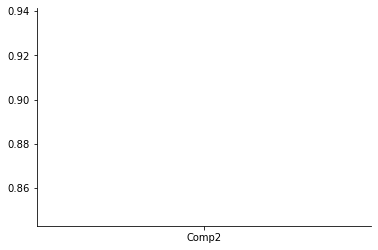

In [28]:
F1_1 = g.graph(t_arr)
F1_1.set_x_axis(df_sim.columns,"Compartments")
F1_1.set_y_axis(df_sim.loc['Na_i'].values, "Voltage (mv)")
F1_1.plot_it()

print(df_sim.loc['Na_i'].values)

### 4.2) Reversal Potentials

### 4.3) Ion concentrations


### 4.4) Volumes